# Analysis for San Francisco Bay Ford GoBike Service

## by Joshua Adesanmi Adetayo

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

The Data Each trip is contains the following features:

1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID  
13. User Type
14. Member Birth Year
15. Member Gender
16. Bike Share For All Trip

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
from matplotlib.ticker import MultipleLocator

%matplotlib inline

##### Data Importation

In [2]:
#importing the dataset
df=pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# Check null value for each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
# Check duplicated row
df.duplicated().sum()

0

### Data Assesment Result
##### Quality Issues
* start_time and end_time columns in object dtype
* start_station_id and end_station_id columns in int64 dtype
* start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude columns in float64 dtype
* bike_id column in int64 dtype
* user_type in object dtype

In [6]:
# Make a new copy before doing any operation, so we can refer back to the old ones.
df_copy = df.copy()

#### Define
> Changing the columns data type appropriately.

#### Code:

In [7]:
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        'start_station_id': 'object',
        'end_station_id': 'object',
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        'bike_id': 'object',
        'user_type': 'category',
        'member_birth_year':'object'}

df_copy = df_copy.astype(dtype)

#### Test

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null object
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: category(1), datetime64[ns](2), int64(1), object(12)
memory usag

In [9]:
#Removing unwanted columns from the dataset for better analysis
df_copy.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
df_copy.head(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes


### Structure of dataset
* The dataset consists of 183412 rows and 16 columns. In the other words, this dataset has 183412 observations and 16 variables.

### Main feature(s) of interest in dataset
* Average trip times 
* Monthly bike ride trend by average trip times 
* Average trip times by gender

### Features in the dataset which will support the investigation
> From the main feature above, I thinks the feature that will help our investigation are:

* The duration per seconds column, it will help in defining the average trip time in seconds. 
* Start_time and end_time columns will help in defining monthly bike ride trends. 
* Member Gender will help in defining the gender average trip times.

### Exploratory Data Analysis

In [10]:
df_copy.describe()

,duration_sec
count,183412.000000
mean,726.078435
std,1794.389780
min,61.000000
25%,325.000000
50%,514.000000
75%,796.000000
max,85444.000000


## Univariate Exploration

In [11]:
# Creating a function to add annotation to univariate bar charts.
def annotation(var):
    # code to add annotations
    n_points = df_copy.shape[0]
    cat_counts = var.value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{}'.format(count)

        # print the annotation just below the top of the bar
        plt.text(loc, count-8, pct_string, ha='center', color = 'black', fontsize=12)
    return plt.text(loc, count-8, pct_string, ha='center', color = 'black', fontsize=12);

### Question
* What is the gender distibution of Users?

#### Visualization

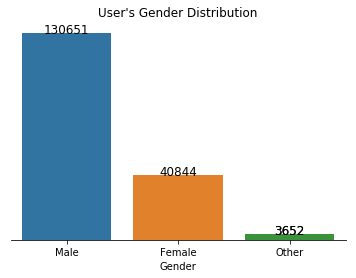

In [12]:
# This visualization shows the gender distribution of users
var=df_copy['member_gender']
Gender =['Male','Female', 'Other']
ax= sns.countplot(data=df_copy,x='member_gender', order=Gender)
plt.title('User\'s Gender Distribution');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Gender');

#calling the annotation function
annotation(var);

#### Observation
> From the chart above, I observed that there are more males among the users.

### Question
* What is the Average Bike Trip(Seconds)

#### Visualization

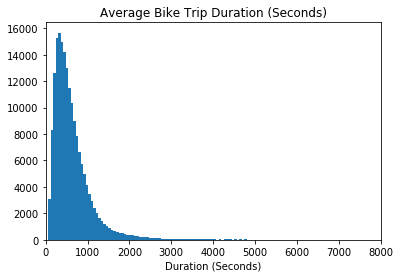

In [13]:
#Plotting of the average trip duration as a main variable.

bin_edges = np.arange(0, df_copy['duration_sec'].max() + 100 , 60)
plt.hist(data = df_copy , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

#### Observations
> There are maximum 140,000 bike trip held for an average 700 seconds. To better understand the duration of average trip, we will check the bike trips with respect to minutes.

### Question
* What is the average bike trip (minutes)

In [14]:
# Converting duration in seconds to minutes
df_copy['duration_min'] = df_copy['duration_sec'] / 60

#### Visualization

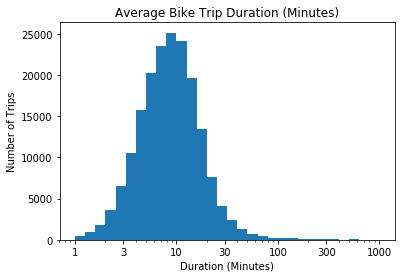

In [15]:
#Log transforming to better understand the data
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Bike Trip Duration (Minutes)');
plt.ylabel('Number of Trips');

#### Observation
>An average bike trip lasted between 1 and just over 100 minutes, with majority of the bike trips lasting just under 10 minutes.

### Question
* What is the distribution of Users?

#### Visualization

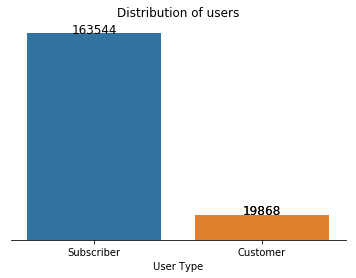

In [16]:
# This visualization shows the distribution of users whether a subscriber of customer
var=df_copy['user_type']
user=['Subscriber','Customer']
ax=sns.countplot(data=df_copy,x='user_type', order=user)
plt.title('Distribution of users')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('User Type');

#calling the annotation function
annotation(var);

#### Observation
> Based on the chart above, its evident we have more subscriber than customers.

### Question
* Does a user share bike for all trips?

#### Visualization

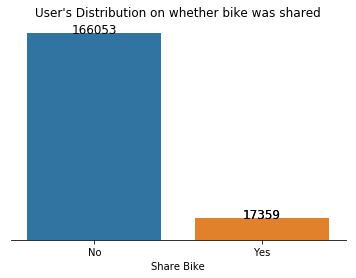

In [17]:
# This visualization shows whether a user shares his/her bike for all trip
var=df_copy['bike_share_for_all_trip']
share =['No','Yes']
ax= sns.countplot(data=df_copy,x='bike_share_for_all_trip', order=share)
plt.title('User\'s Distribution on whether bike was shared')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Share Bike');

#calling the annotation function
annotation(var);

#### Observation
> It was observed that majority of the users don't share bikes for all trips.

### Question
* What is the percentage of bike users?

#### Visualization

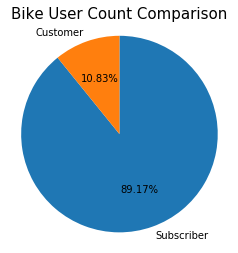

In [18]:
# Showing distribution of user type by percentage
var= df_copy['user_type'].value_counts()
plt.pie(var, labels = var.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Count Comparison', fontsize=15);

#### Observation
> Subscribers account for 89\% of the bike users while the remaining 11\% are customers.

In [19]:
# Creating new columns for day and hour of bike ride
df_copy['start_day'] = df_copy['start_time'].dt.day_name()
df_copy['hour'] = df_copy['start_time'].dt.hour

### Question
* What is the bike usage based on weekday?

#### Visualization

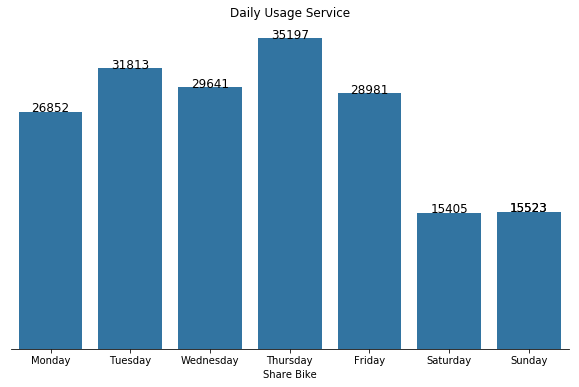

In [20]:
# Countplot bike usage based on weekday
var=df_copy['start_day']
base_color = sns.color_palette()[0]
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service')
ax=sns.countplot(data=df_copy, x='start_day', order=day_name, color=base_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('Share Bike');

#calling the annotation function
annotation(var);

#### Observation
> This service is more widely used on weekdays than weekends. Based on the chart above, I observe that Thursday has the highest number of usage, while Saturday and Sunday has the lowest number of usage. I believe this happens because the majority of users are subscribers who are actively cycling on weekdays.

### Question
* What is the bike usage based on hour of the day?

#### Visualization

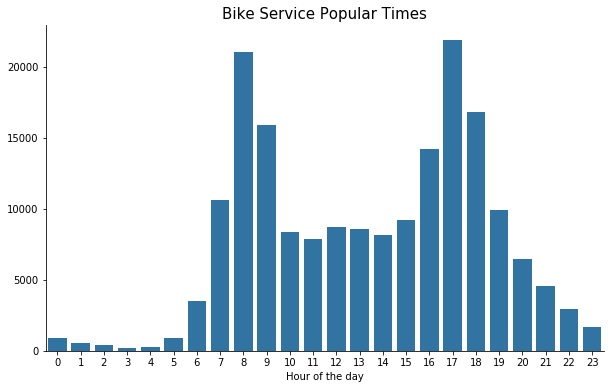

In [21]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df_copy, x='hour', order=hour_order, color=base_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks()
plt.ylabel('')
plt.xlabel('Hour of the day');

### Question
* What are the top 10 starting point for bike trips?

#### Visualization

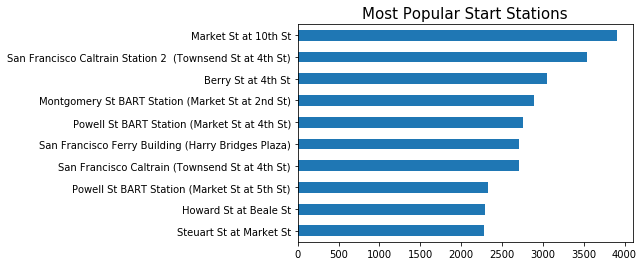

In [22]:
plt.title('Most Popular Start Stations', fontsize=15)
df_copy.start_station_name.value_counts(ascending=True).tail(10).plot.barh(color=base_color);

#### Observation
> From the bar chart above, It was observed that most of the trips are initiated from Market Street at 10th Street.

## Bivariate Exploration

#### Question
* What is the user distribution based on gender?

#### Visualization

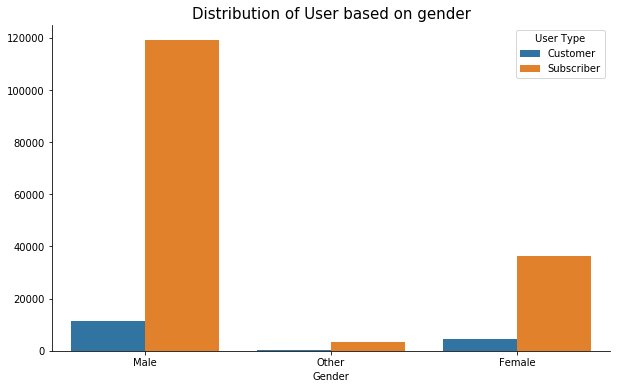

In [23]:
plt.figure(figsize=(10,6))
plt.title('Distribution of User based on gender', fontsize=15)
ax = sns.countplot(data=df_copy, x='member_gender', hue='user_type')
ax.set(xlabel='Gender', ylabel='')
plt.gca().legend().set_title('User Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks();

#### Question
* What is the distribution of users based on sharing rides?

#### Visualization

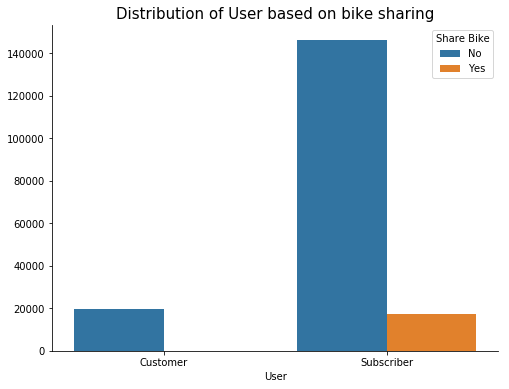

In [24]:
plt.figure(figsize=(8,6))
plt.title('Distribution of User based on bike sharing', fontsize=15)
ax = sns.countplot(data=df_copy, x='user_type', hue='bike_share_for_all_trip')
ax.set(xlabel='User', ylabel='')
plt.gca().legend().set_title('Share Bike')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks();

### Question
* What is the bike usage per day based on gender?

#### Visualization

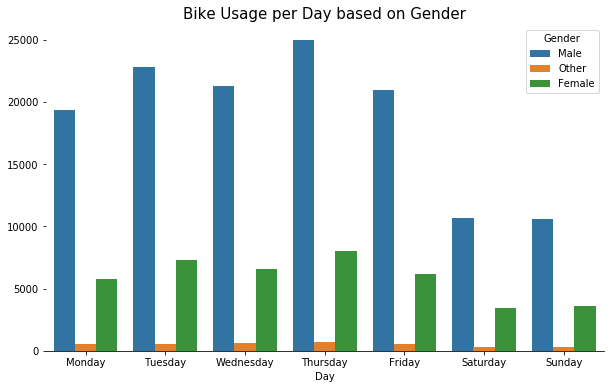

In [25]:
plt.figure(figsize=(10,6))
plt.title('Bike Usage per Day based on Gender', fontsize=15)
chart = sns.countplot(data=df_copy, x='start_day', order=day_name, hue='member_gender')
chart.set(xlabel='Day', ylabel='')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('Gender');

### Question
* What is the hourly usage of bikes per day based on user type?

#### Visualization

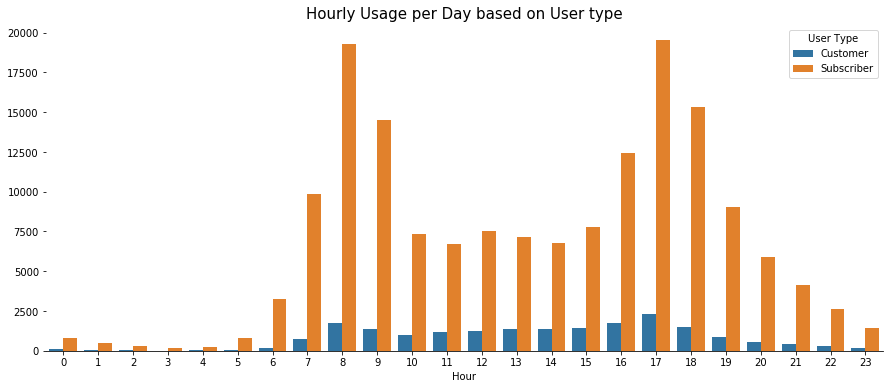

In [26]:
# Hourly usage per day based on user type
plt.figure(figsize=(15,6))
plt.title('Hourly Usage per Day based on User type', fontsize=15)
chart = sns.countplot(data=df_copy, x='hour', hue='user_type')
chart.set(xlabel='Hour', ylabel='')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('User Type');

#### Observation
> From the chart above, its evident we have more usage by subscribers in the morning and later in the evening. I also notice the customers have the same pattern, most of the customers have more usage in the morning and later in the evening around 4pm to 6pm.

### Question
* What is the hourly usage of bike per day with respect to gender?

#### Visualization

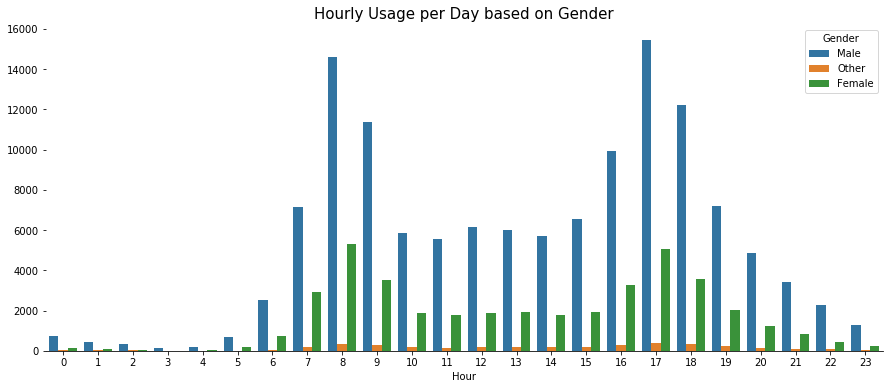

In [30]:
# Hourly usage per day based on Gender
plt.figure(figsize=(15,6))
plt.title('Hourly Usage per Day based on Gender', fontsize=15)
chart = sns.countplot(data=df_copy, x='hour', hue='member_gender')
chart.set(xlabel='Hour', ylabel='')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('Gender');

#### Observation
> Based on the chart above,We can be observe that we have more users during the peak hours.

## Multivariate Exploration

### Question
* What is the Hourly Duration Usage based on sharing bike?

#### Visualization

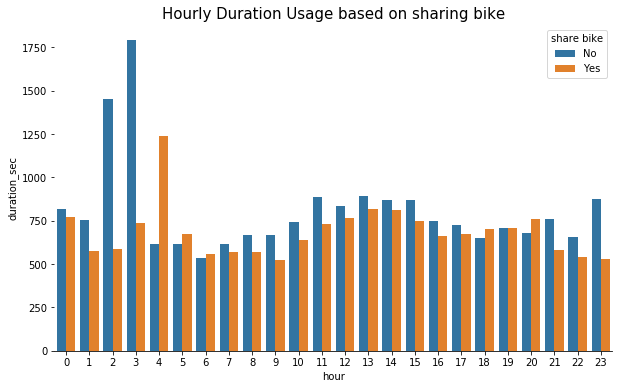

In [28]:
plt.figure(figsize=(10,6))
plt.title('Hourly Duration Usage based on sharing bike', fontsize=15)
sns.barplot(data=df_copy, x='hour', y='duration_sec', ci=None, hue='bike_share_for_all_trip')

chart.set(xlabel='Hour', ylabel='')

# Adding legend
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('share bike');

#### Observation
> Considering the chart above, we observed that sharing of bike happened almost equal with respect to usage and hour of the day.

### Question
* What is the Hourly Duration Usage with respect to gender?

#### Visualization

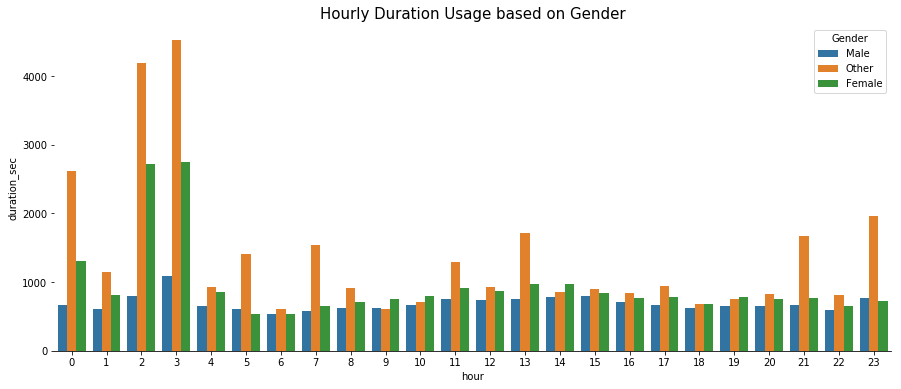

In [29]:
plt.figure(figsize=(15,6))
plt.title('Hourly Duration Usage based on Gender', fontsize=15)
sns.barplot(data=df_copy, x='hour', y='duration_sec', ci=None, hue='member_gender')
chart.set(xlabel='Hour', ylabel='')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('Gender');

#### Observation
> From the chart above, we observed that females have a longer use of bicycle compared to male. Also, the longest trips happened in the early hour of the day.

## Conclusions
> There are more subscribers compared to customers, and we have more usage of the bikes during the peak hours (8am and 5pm).